In [2]:
!pip install swig
!pip install gym
!pip install gym[atari]
!apt install xvfb
!pip install ale-py
# !pip install atari-py
!pip install gymnasium
!pip install "gymnasium[atari, accept-rom-license]"
# !apt install xvfb
# !pip install gym[atari]
!pip install gym-notebook-wrapper
!pip install atari-py
!pip install pyvirtualdisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu

In [3]:
%%capture
%%bash
curl -O http://www.atarimania.com/roms/Roms.rar
mkdir -p roms
yes | unrar e Roms.rar roms/
python -m atari_py.import_roms roms/


In [4]:
!rm -rf game/*
!mkdir -p game
!pip install ray[rllib]==1.13.0
!pip install -U "ray[train]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import gym

all_envs = gym.envs.registry.values()

for env in all_envs:
    env_id = env.id
    print(env_id)


ALE/Adventure-v5
ALE/Adventure-ram-v5
ALE/AirRaid-v5
ALE/AirRaid-ram-v5
ALE/Alien-v5
ALE/Alien-ram-v5
ALE/Amidar-v5
ALE/Amidar-ram-v5
ALE/Assault-v5
ALE/Assault-ram-v5
ALE/Asterix-v5
ALE/Asterix-ram-v5
ALE/Asteroids-v5
ALE/Asteroids-ram-v5
ALE/Atlantis-v5
ALE/Atlantis-ram-v5
ALE/Atlantis2-v5
ALE/Atlantis2-ram-v5
ALE/Backgammon-v5
ALE/Backgammon-ram-v5
ALE/BankHeist-v5
ALE/BankHeist-ram-v5
ALE/BasicMath-v5
ALE/BasicMath-ram-v5
ALE/BattleZone-v5
ALE/BattleZone-ram-v5
ALE/BeamRider-v5
ALE/BeamRider-ram-v5
ALE/Berzerk-v5
ALE/Berzerk-ram-v5
ALE/Blackjack-v5
ALE/Blackjack-ram-v5
ALE/Bowling-v5
ALE/Bowling-ram-v5
ALE/Boxing-v5
ALE/Boxing-ram-v5
ALE/Breakout-v5
ALE/Breakout-ram-v5
ALE/Carnival-v5
ALE/Carnival-ram-v5
ALE/Casino-v5
ALE/Casino-ram-v5
ALE/Centipede-v5
ALE/Centipede-ram-v5
ALE/ChopperCommand-v5
ALE/ChopperCommand-ram-v5
ALE/CrazyClimber-v5
ALE/CrazyClimber-ram-v5
ALE/Crossbow-v5
ALE/Crossbow-ram-v5
ALE/Darkchambers-v5
ALE/Darkchambers-ram-v5
ALE/Defender-v5
ALE/Defender-ram-v5
ALE/

In [ ]:
import gym
import torch
import numpy as np
from collections import namedtuple
import random, math
import matplotlib.pyplot as plt
from ray.rllib.models import ModelCatalog
from ray.rllib.env.env_context import EnvContext
import time
import os
from gym.spaces import Discrete, Box
from ray import tune
import ray
from ray.rllib.algorithms.dqn import DQNConfig

# Set up the environment
ray.shutdown()
ray.init(num_cpus=2, num_gpus=1)

# Define the DQN configuration
dqn_config = DQNConfig() \
    .training(gamma=0.9, lr=0.01) \
    .resources(num_gpus=1) \
    .environment(env="Breakout-ram-v0") \
    .env_runners(num_env_runners=1)

# Define the model configuration
dqn_config.model["fcnet_hiddens"] = [128]
dqn_config.model["fcnet_activation"] = "relu"

# Train the DQN agent
analysis = tune.run(
    "DQN",
    stop={"episode_reward_mean": 5},
    config=dqn_config.to_dict(),
    local_dir="/content/drive/MyDrive/INM707/breakout_v1",
    checkpoint_config={"checkpoint_frequency": 10},
)

# Restore the trained agent
checkpoint_file = "/content/drive/MyDrive/INM707/breakout_v1/DQN/DQN_Breakout-ram-v0_02894_00000_0_2022-04-22_20-58-50/checkpoint_000250/checkpoint-250"
dqn_trainer = dqn_config.build()
dqn_trainer.restore(checkpoint_file)

# Evaluate the trained agent
env = gym.make("Breakout-ram-v0")
state = env.reset()
done = False
total_reward = 0

while not done:
    action = dqn_trainer.compute_single_action(state)
    state, reward, done, _ = env.step(action)
    total_reward += reward

env.close()
print("Total Reward:", total_reward)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-05-12 11:17:41,553	INFO worker.py:1749 -- Started a local Ray instance.
/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:583: UserWarning: The `local_dir` argument is deprecated and will be removed. This will pass-through to set the `storage_path` for now but will raise an error in the future. You should only set the `storage_path` from now on.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dt

+------------------------------------------------------------+
| Configuration for experiment     DQN_2024-05-12_11-17-44   |
+------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator     |
| Scheduler                        FIFOScheduler             |
| Number of trials                 1                         |
+------------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-05-12_11-17-35_894580_27609/artifacts/2024-05-12_11-17-44/DQN_2024-05-12_11-17-44/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-12 11:17:44. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------+
| Trial name                        status   |
+--------------------

(pid=28947) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=28947)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=28947) 2024-05-12 11:17:56,290	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(DQN pid=28947) 2024-05-12 11:17:56,290	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(pid=29034) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=29034)   if (distutils.version.Loose


Trial DQN_Breakout-ram-v0_41256_00000 started with configuration:
+---------------------------------------------------------------------------+
| Trial DQN_Breakout-ram-v0_41256_00000 config                              |
+---------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                |
| _disable_action_flattening                                          False |
| _disable_execution_plan_api                                            -1 |
| _disable_initialize_loss_from_dummy_batch                           False |
| _disable_preprocessor_api                                           False |
| _enable_rl_module_api                                                  -1 |
| _env_to_module_connector                                                  |
| _evaluation_parallel_to_training_wo_thread                          False |
| _fake_gpus                                                          False

(DQN pid=28947) Trainable.setup took 12.435 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
(DQN pid=28947) Install gputil for GPU system monitoring.



Trial status: 1 RUNNING
Current time: 2024-05-12 11:18:14. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------+
| Trial name                        status   |
+--------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING  |
+--------------------------------------------+

Trial DQN_Breakout-ram-v0_41256_00000 finished iteration 1 at 2024-05-12 11:18:15. Total running time: 31s
+----------------------------------------------------------+
| Trial DQN_Breakout-ram-v0_41256_00000 result             |
+----------------------------------------------------------+
| env_runner_results/episode_len_mean              278.667 |
| env_runner_results/episode_return_mean                 2 |
| num_env_steps_sampled_lifetime                      1000 |
+----------------------------------------------------------+


(DQN pid=28947) 2024-05-12 11:18:15,569	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!
(DQN pid=28947) /usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment Breakout-ram-v0 is out of date. You should consider upgrading to version `v4`.
(DQN pid=28947)   logger.deprecation(
(DQN pid=28947) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=28947) [Powered by Stella]
(DQN pid=28947) /usr/local/lib/python3.10/dist-packages/ray/rllib/connectors/agent/obs_preproc.py:37: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html


Trial status: 1 RUNNING
Current time: 2024-05-12 11:18:44. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING         1             6.7648   1000          2                      4                      0              278.667                      3 |
+------------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000000)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:24:15. Total running time: 6min 31s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        10             366.07   10000    1.70588                      9                      0              285.559                      2 |
+-------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000001)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:31:16. Total running time: 13min 31s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        20            763.886   20000    1.63235                      9                      0              293.529                      4 |
+------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000002)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:37:46. Total running time: 20min 2s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        30            1164.18   30000       1.29                      5                      0               279.59                      4 |
+-------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000003)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:44:17. Total running time: 26min 32s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        40            1561.13   40000       1.34                      6                      0               275.17                      4 |
+------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000004)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:51:17. Total running time: 33min 33s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        50            1964.72   50000       1.39                      7                      0               280.39                      4 |
+------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000005)



Trial status: 1 RUNNING
Current time: 2024-05-12 11:58:18. Total running time: 40min 34s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        60            2392.78   60000       1.46                      7                      0               279.71                      4 |
+------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000006)



Trial status: 1 RUNNING
Current time: 2024-05-12 12:04:49. Total running time: 47min 4s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        70            2795.58   70000       1.35                      6                      0               275.43                      4 |
+-------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000007)



Trial status: 1 RUNNING
Current time: 2024-05-12 12:11:50. Total running time: 54min 5s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        80            3199.79   80000       1.22                      6                      0               270.53                      4 |
+-------------------------------------------------------------------------------------------------

(DQN pid=28947) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/INM707/breakout_v1/DQN_2024-05-12_11-17-44/DQN_Breakout-ram-v0_41256_00000_0_2024-05-12_11-17-44/checkpoint_000008)



Trial status: 1 RUNNING
Current time: 2024-05-12 12:18:20. Total running time: 1hr 0min 36s
Logical resource usage: 2.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                        status       iter     total time (s)      ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DQN_Breakout-ram-v0_41256_00000   RUNNING        90             3605.5   90000       1.12                      4                      0               267.58                      3 |
+---------------------------------------------------------------------------------------------

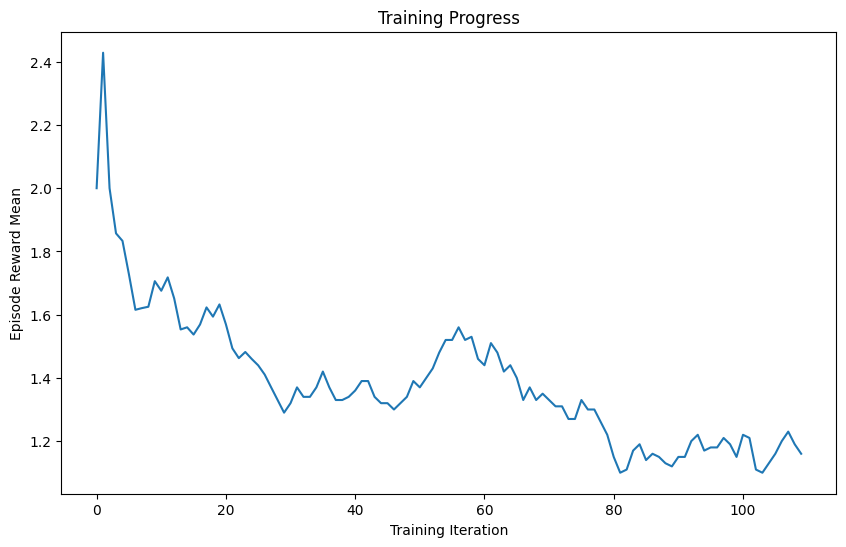

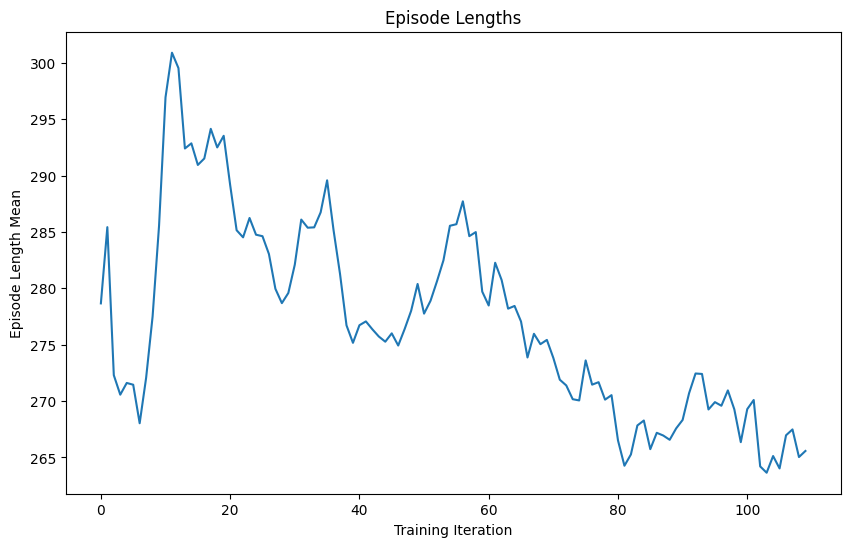

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os


results_dir = "/content/drive/MyDrive/INM707/breakout_v1"


csv_file = None
for root, dirs, files in os.walk(results_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break

if csv_file:

    df = pd.read_csv(csv_file)


    if 'episode_reward_mean' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['episode_reward_mean'])
        plt.xlabel('Training Iteration')
        plt.ylabel('Episode Reward Mean')
        plt.title('Training Progress')
        plt.show()
    else:
        print("Column 'episode_reward_mean' not found in the training results.")


    if 'episode_len_mean' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['episode_len_mean'])
        plt.xlabel('Training Iteration')
        plt.ylabel('Episode Length Mean')
        plt.title('Episode Lengths')
        plt.show()
    else:
        print("Column 'episode_len_mean' not found in the training results.")
else:
    print("No CSV file found in the specified directory.")